<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/DR-mostafa/blob/main/vae%20try/ecg_generation_vae_to_be_completed_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle part

In [ ]:
!conda install -y gdown

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    filelock-3.8.0             |     pyhd8ed1ab_0          13 KB  conda-forge
    gdown-4.5.1                |     pyhd8ed1ab_0          17 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.8.0-pyhd8ed1ab_0
  gdown              conda-forge/noarch::gdown-4.5.1-pyhd8ed1ab_0

The following packages will be

In [ ]:
#downloading first part of ECG
!gdown https://drive.google.com/uc?id=1jt__DwKtdHOQypNVBjnp9SeaqGwoRazG


Downloading...
From: https://drive.google.com/uc?id=1jt__DwKtdHOQypNVBjnp9SeaqGwoRazG
To: /kaggle/working/part_1_ECG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 150M/150M [00:01<00:00, 119MB/s]


In [ ]:
#downloading second part of ecg  beats data
!gdown https://drive.google.com/uc?id=1K1-xeL4RKmURSsppi0X7s7U4TQVOy7eF   

Downloading...
From: https://drive.google.com/uc?id=1K1-xeL4RKmURSsppi0X7s7U4TQVOy7eF
To: /kaggle/working/Part_2_ECG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 196M/196M [00:01<00:00, 149MB/s]


In [ ]:
#downloading third part of ecg  beats data
!gdown https://drive.google.com/uc?id=1w-2QFZ5CnchAm0JkwfQ-lLBTwLYO4Hc0   

Downloading...
From: https://drive.google.com/uc?id=1w-2QFZ5CnchAm0JkwfQ-lLBTwLYO4Hc0
To: /kaggle/working/Part_3_ECG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 150M/150M [00:01<00:00, 131MB/s]


In [ ]:
#downloading fourth part of ecg  beats data
!gdown https://drive.google.com/uc?id=13Y7gLQb3FNWsRlQ8DUp5JP9UUttjytQm

Downloading...
From: https://drive.google.com/uc?id=13Y7gLQb3FNWsRlQ8DUp5JP9UUttjytQm
To: /kaggle/working/Part_4_ECG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 172M/172M [00:01<00:00, 145MB/s]


In [ ]:
#downloading first part of PPG  beats data
!gdown https://drive.google.com/uc?id=1u-QWYMJ3h7bd2fWy5UmUgQtCtvmWge-K

Downloading...
From: https://drive.google.com/uc?id=1u-QWYMJ3h7bd2fWy5UmUgQtCtvmWge-K
To: /kaggle/working/part_1_PPG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 151M/151M [00:01<00:00, 121MB/s]


In [ ]:
#downloading second part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1F086tcERdEOcsbvqRmhN6PGX6NVZqX3P

Downloading...
From: https://drive.google.com/uc?id=1F086tcERdEOcsbvqRmhN6PGX6NVZqX3P
To: /kaggle/working/Part_2_PPG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 200M/200M [00:01<00:00, 124MB/s]


In [ ]:
#downloading third part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1LWxX-F5z177l6OEUS4V7nJxbJnpK4A5G

Downloading...
From: https://drive.google.com/uc?id=1LWxX-F5z177l6OEUS4V7nJxbJnpK4A5G
To: /kaggle/working/Part_3_PPG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 148M/148M [00:00<00:00, 150MB/s]


In [ ]:
#downloading fourth part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1faRVH5KPR-q4gxhS86DFfkStCxYo5tHd

Downloading...
From: https://drive.google.com/uc?id=1faRVH5KPR-q4gxhS86DFfkStCxYo5tHd
To: /kaggle/working/Part_4_PPG_beats_P2P_Aug_2022.csv
100%|█████████████████████████████████████████| 174M/174M [00:01<00:00, 142MB/s]


# importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from keras.layers import *
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import Model
from  IPython.display import clear_output
import seaborn as sns
#for Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

#Mounting Drive and reading data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/MyDrive/Master/')

In [4]:
import Functions_Classes as F

In [5]:
ECG1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_ECG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
PPG1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))


PPG2 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))

ECG2= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))


PPG3 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
ECG3= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))


PPG4 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
ECG4= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))

In [6]:
ID1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv"
                    ,names = ['id'])
ID2 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_Subj_ID_beats_P2P_Aug_2022.csv",
                  names = ['id'])
ID3 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_Subj_ID_beats_P2P_Aug_2022.csv",
                  names = ['id'])
ID4 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_Subj_ID_beats_P2P_Aug_2022.csv",
                  names = ['id'])

# checking shapes

In [7]:
print("Shape of PPG 1 = ",PPG1.shape)
print("Shape of ECG 1 = ",ECG1.shape)
print("Shape of ID 1 = ",ID1.shape)
print("**"*20)

print("Shape of PPG 2 = ",PPG2.shape)
print("Shape of ECG 2 = ",ECG2.shape)
print("Shape of ID 2 = ",ID2.shape)
print("**"*20)

print("Shape of PPG 3 = ",PPG3.shape)
print("Shape of ECG 3 = ",ECG3.shape)
print("Shape of ID 3 = ",ID3.shape)
print("**"*20)


print("Shape of PPG 4 = ",PPG4.shape)
print("Shape of ECG 4 = ",ECG4.shape)
print("Shape of ID 4 = ",ID4.shape)

Shape of PPG 1 =  (154540, 120)
Shape of ECG 1 =  (154540, 120)
Shape of ID 1 =  (154540, 1)
****************************************
Shape of PPG 2 =  (205320, 120)
Shape of ECG 2 =  (205320, 120)
Shape of ID 2 =  (205320, 1)
****************************************
Shape of PPG 3 =  (152650, 120)
Shape of ECG 3 =  (152650, 120)
Shape of ID 3 =  (152650, 1)
****************************************
Shape of PPG 4 =  (179060, 120)
Shape of ECG 4 =  (179060, 120)
Shape of ID 4 =  (179060, 1)


In [8]:
PPG1.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.00000,0.99971,0.99898,0.99602,0.99104,0.98427,0.97570,0.96534,0.95313,0.93891,...,0.86711,0.89480,0.91637,0.93424,0.95006,0.96290,0.97265,0.97946,0.98329,0.98515
1,1.00000,0.99986,0.99938,0.99671,0.99211,0.98582,0.97781,0.96817,0.95657,0.94259,...,0.87321,0.89588,0.91331,0.92665,0.93742,0.94541,0.95071,0.95352,0.95363,0.95355
2,1.00000,0.99805,0.99416,0.98829,0.98048,0.97107,0.96004,0.94735,0.93303,0.91708,...,0.83197,0.86486,0.89022,0.91013,0.92479,0.93626,0.94502,0.95083,0.95364,0.95499
3,0.91394,0.91331,0.91198,0.90826,0.90231,0.89456,0.88500,0.87378,0.86088,0.84626,...,0.86086,0.89582,0.92488,0.94820,0.96554,0.97851,0.98723,0.99360,0.99787,1.00000
4,0.91259,0.91280,0.91298,0.91087,0.90681,0.90120,0.89398,0.88514,0.87469,0.86219,...,0.91012,0.93643,0.95764,0.97392,0.98525,0.99285,0.99716,0.99942,0.99987,1.00000


In [9]:
PPG_train ,PPG_test = F.train_test_seperator_all([PPG1 , PPG2,PPG3,PPG4],[ID1,ID2,ID3,ID4],1,301)

In [10]:
ECG_train ,ECG_test = F.train_test_seperator_all([ECG1 , ECG2,ECG3,ECG4],[ID1,ID2,ID3,ID4],1,301)

In [11]:
PPG_train.shape , PPG_test.shape , ECG_train.shape , ECG_test.shape

((632240, 120), (59330, 120), (632240, 120), (59330, 120))

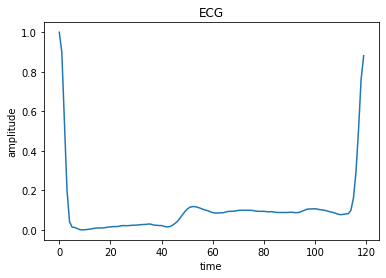

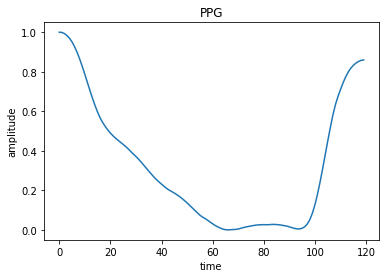

In [12]:
plt.plot(ECG_train.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("ECG");

plt.figure();
plt.plot(PPG_train.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("PPG");

# Some Data Visualization

variance ratio is  [0.40243247 0.28516978 0.11556709]
outliers from  pca1  column is  (3571,)
outliers from  pca2  column is  (10959,)
outliers from  pca3  column is  (17591,)
histogram of pca with and without outliers
shape with outliers is  (632240, 120)
shape without outliers is (600119, 120)


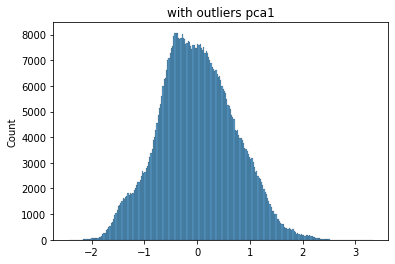

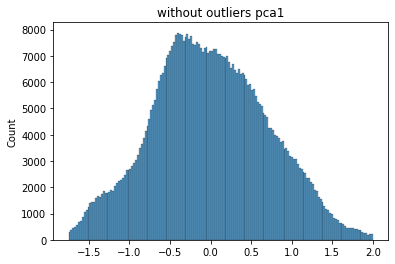

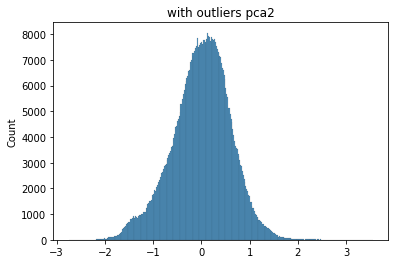

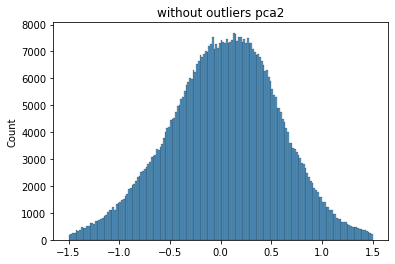

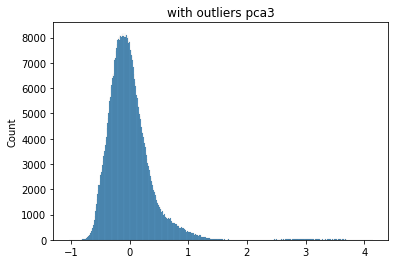

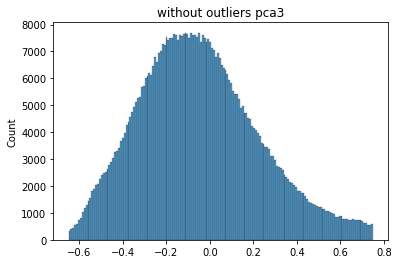

In [13]:
PPG_train , ECG_train= F.all_together(PPG_train,ECG_train, 1,[(2,-1.75),(1.5,-1.5),(0.75,-0.65)])[2:]

variance ratio is  [0.37639139 0.25840037 0.12860031]
outliers from  pca1  column is  (20,)
outliers from  pca2  column is  (478,)
outliers from  pca3  column is  (1435,)
histogram of pca with and without outliers
shape with outliers is  (59330, 120)
shape without outliers is (57397, 120)


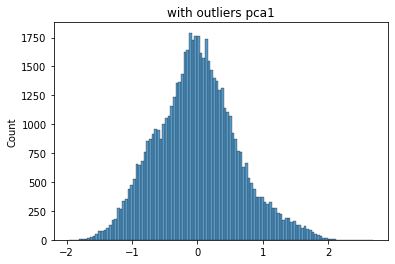

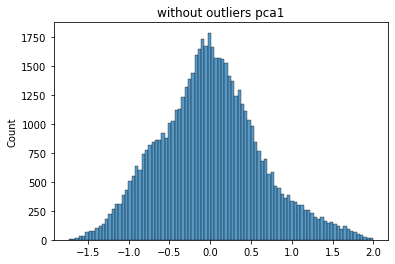

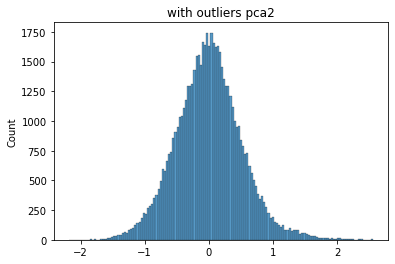

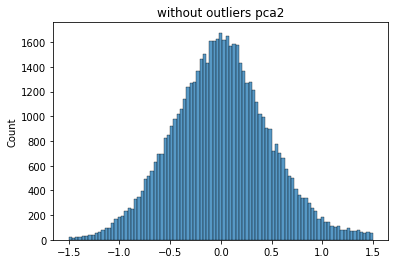

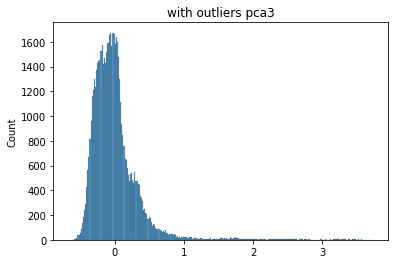

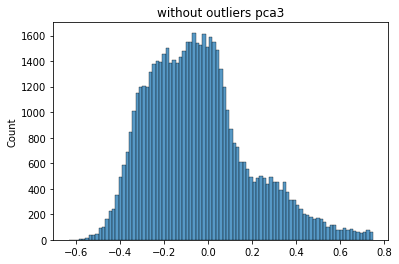

In [14]:
PPG_test  , ECG_test  = F.all_together(PPG_test,ECG_test, 1,[(2,-1.75),(1.5,-1.5),(0.75,-0.65)])[2:]       

#Training and testing data preprocessing

In [15]:
# Define global constants to be used in this notebook
BATCH_SIZE = 32
LATENT_DIM=128

In [16]:
def get_dataset(training_df,is_validation=False,BATCH_SIZE=32):
    '''Loads and prepares the mnist dataset from TFDS'''
    if is_validation:
        split_name = "test"
    else:
        split_name = "train"
    tf.executing_eagerly()
    features = training_df.columns
    training_dataset = (tf.data.Dataset.from_tensor_slices((tf.cast(training_df[features].values, tf.float32),)))
    dataset = training_dataset.batch(BATCH_SIZE)
    return dataset


In [17]:
#for shuffling
indexes_train = np.random.randint(0,PPG_train.shape[0],PPG_train.shape[0])
train_dataset_ppg = get_dataset(PPG_train.iloc[indexes_train,:],True,32)
train_dataset_ecg = get_dataset(ECG_train.iloc[indexes_train,:],True,32)

indexes_test = np.random.randint(0,PPG_test.shape[0],PPG_test.shape[0])
test_dataset_ppg = get_dataset(PPG_test.iloc[indexes_test,:],True,32)
test_dataset_ecg = get_dataset(ECG_test.iloc[indexes_test,:],True,32)


# Variational autoencoder functions

In [18]:
class Sampling(tf.keras.layers.Layer):
    
    def call(self, inputs):
        """Generates a random sample and combines with encoder output

        Args:
          inputs -- output tensor from the encoder

        Returns:
      `inputs` tensors combined with a random sample
        """

        # unpack the output of the encoder
        mu, sigma = inputs

        # get the size and dimensions of the batch
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]

        # generate a random tensor
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))

        # combine the inputs and noise
        return mu + tf.exp(0.5 * sigma) * epsilon
    def get_config(self):
      config = super(Sampling, self).get_config()
      return config

In [19]:
def encoder_layers(inputs, latent_dim):
  """Defines the encoder's layers
  Args:
    inputs -- batch from the dataset
    latent_dim -- dimensionality of the latent space
  
  Returns:
    mu -- learned mean
    sigma -- learned standard deviation
    batch_2.shape -- shape of the features before flattening
  """

  x = Conv1D(256, 5, padding="same")(inputs)
  x = LeakyReLU()(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)
    
  x = Conv1D(512, 5, padding="same")(inputs)
  x = LeakyReLU()(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)

  x = Conv1D(128, 5, padding='same')(x)
  x = LeakyReLU()(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)

  x = Conv1D(64, 3, padding='same')(x)
  x = LeakyReLU()(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)

  x = Conv1D(32,3, activation='relu', padding='same')(x)
  batch_2 = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Flatten(name="encode_flatten")(batch_2)

  

  # we arbitrarily used 20 units here but feel free to change and see what results you get
  x = tf.keras.layers.Dense(60, activation="relu", name="encoder_dense")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  # add output Dense networks for mu and sigma, units equal to the declared latent_dim
  mu = tf.keras.layers.Dense(latent_dim, name="latent_mu")(x)
  sigma = tf.keras.layers.Dense(latent_dim, name="latent_sigma")(x)

  return mu, sigma, batch_2.shape

In [20]:
def encoder_model(latent_dim, input_shape):
    """Defines the encoder model with the Sampling layer

     Args:
      latent_dim -- dimensionality of the latent space
      input_shape -- shape of the dataset batch

    Returns:
     model -- the encoder model
      conv_shape -- shape of the features before flattening
    """

    # declare the inputs tensor with the given shape
    inputs = tf.keras.layers.Input(shape=input_shape)

    # get the output of the encoder_layers() function
    mu, sigma, conv_shape = encoder_layers(inputs, latent_dim=LATENT_DIM)

    # feed mu and sigma to the sampling layer
    z = Sampling()((mu, sigma))

    # build the whole encoder model
    model = tf.keras.Model(inputs=inputs, outputs=[mu, sigma, z])

    return model, conv_shape

In [21]:
def decoder_layers(inputs, conv_shape):
  """Defines the decoder layer
  Args:
    inputs -- output of the decoder
    conv_shape -- shape of the features before flattening

  Returns:
    tensor containing the decoded output
  """

  # feed to a Dense network with units computed from the conv_shape dimensions
  units = conv_shape[1] * conv_shape[2] 
  x = tf.keras.layers.Dense(units, name="decode_dense1")(inputs)
  x = LeakyReLU()(x)
  x = tf.keras.layers.BatchNormalization()(x)

  # reshape output using the conv_shape dimensions
  x = tf.keras.layers.Reshape((conv_shape[1], conv_shape[2]), name="decode_reshape")(x)

  # upsample the features back to the original dimensions
  x = Conv1DTranspose(32, 3 , padding='same',strides = 2)(x)
  x = LeakyReLU()(x)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = UpSampling1D(2)(x)
    
  x = Conv1DTranspose(64, 3, padding='same',strides = 2)(x)
  x = LeakyReLU()(x)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = UpSampling1D(2)(x)
    
  x = Conv1DTranspose(128, 5, padding='same',strides = 2)(x)
  x = LeakyReLU()(x)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = UpSampling1D(2)(x)
  
  x = Conv1DTranspose(512, 5, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = UpSampling1D(2)(x)
    
  
  x = Conv1DTranspose(1, 5, activation='relu', padding='same')(x)
 # x = UpSampling1D(2)(x)
  #x = Dense(120, activation='relu')(x)

  return x

In [22]:
def decoder_model(latent_dim, conv_shape):
    inputs = tf.keras.layers.Input(shape=(latent_dim,))

    # get the output of the decoder layers
    outputs = decoder_layers(inputs, conv_shape)

    # declare the inputs and outputs of the model
    model = tf.keras.Model(inputs, outputs)

    return model

In [23]:
def kl_reconstruction_loss(inputs, outputs, mu, sigma):
    
    # honestly, to truly understand this loss is challenging to me
    kl_loss = 1 + sigma - tf.square(mu) - tf.math.exp(sigma)
    kl_loss = tf.reduce_mean(kl_loss) * - 0.5

    return kl_loss


In [24]:
def vae_model(encoder, decoder, input_shape):

    # set the inputs
    inputs = tf.keras.layers.Input(shape=input_shape)

    # get mu, sigma, and z from the encoder output
    mu, sigma, z = encoder(inputs)

    # get reconstructed output from the encoder
    reconstructed = decoder(z)

    # define the inputs and outputs to the VAE
    model = tf.keras.Model(inputs=inputs, outputs=reconstructed)

    # add the KL loss
    loss = kl_reconstruction_loss(inputs, z, mu, sigma)
    model.add_loss(loss)

    return model


In [25]:
def get_models(input_shape, latent_dim):
  
    encoder, conv_shape = encoder_model(latent_dim=latent_dim, input_shape=input_shape)
    decoder = decoder_model(latent_dim=latent_dim, conv_shape=conv_shape)
    vae = vae_model(encoder, decoder, input_shape=input_shape)
    return encoder, decoder, vae

#Model instantiating

In [26]:
# Get the encoder, decoder and 'master' model (called vae)
encoder, decoder, vae = get_models(input_shape=(120,1), latent_dim=LATENT_DIM)

In [27]:
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 1)]     0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 120, 512)     3072        ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu_1 (LeakyReLU)      (None, 120, 512)     0           ['conv1d_1[0][0]']               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 120, 512)    2048        ['leaky_re_lu_1[0][0]']          
 rmalization)                                                                                 

In [28]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128)]             0         
                                                                 
 decode_dense1 (Dense)       (None, 480)               61920     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 480)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 480)              1920      
 hNormalization)                                                 
                                                                 
 decode_reshape (Reshape)    (None, 15, 32)            0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 30, 32)           3104      
 nspose)                                                   

In [29]:
vae.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 120, 1)]     0           []                               
                                                                                                  
 model (Functional)             [(None, 128),        409356      ['input_3[0][0]']                
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                                  
 model_1 (Functional)           (None, 120, 1)       447937      ['model[0][2]']                  
                                                                                            

#Model compiling and training

In [30]:
# Define our loss functions and optimizers
optimizer = tf.keras.optimizers.Adam()
loss_metric = tf.keras.metrics.Mean()
bce_loss = tf.keras.losses.MeanSquaredError()

#Training monitor functions

In [31]:
def generate_and_save_images(model, epoch, step, test_input):
    # generate images from the test input
    predictions = model.predict(test_input)

    # plot the results
    fig = plt.figure(figsize=(10,10))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.plot(predictions[i, :, 0])
      

    # tight_layout minimizes the overlap between 2 sub-plots
    fig.suptitle("epoch: {}, step: {}".format(epoch, step))
    plt.savefig('image_at_epoch_{:04d}_step{:04d}.png'.format(epoch, step))
    plt.show()

In [32]:
def modified_generate_and_save_images(model, epoch, step, test_input,test_output):
  """Helper function to plot our 16 images

  Args:

  model -- the decoder model
  epoch -- current epoch number during training
  step -- current step number during training
  test_input -- random tensor with shape (16, LATENT_DIM)
  """

  # generate images from the test input
 
  predictions = model.predict(test_input)
 
  
  # plot the results
  fig = plt.figure(figsize=(15,10))

  for i in range(8):
      plt.subplot(2, 4, i+1)
      plt.plot(predictions[i, :, 0],'b--')
      plt.plot(test_output[i,:],'r')
      #plt.plot(test_input[samples][i,:,0],'g')

  # tight_layout minimizes the overlap between 2 sub-plots
  fig.suptitle("epoch: {}, step: {}".format(epoch, step))
  #plt.savefig('image_at_epoch_{:04d}_step{:04d}.png'.format(epoch, step))
  plt.show()

#Model Training loop

1/1 [==============================] - 0s 18ms/step


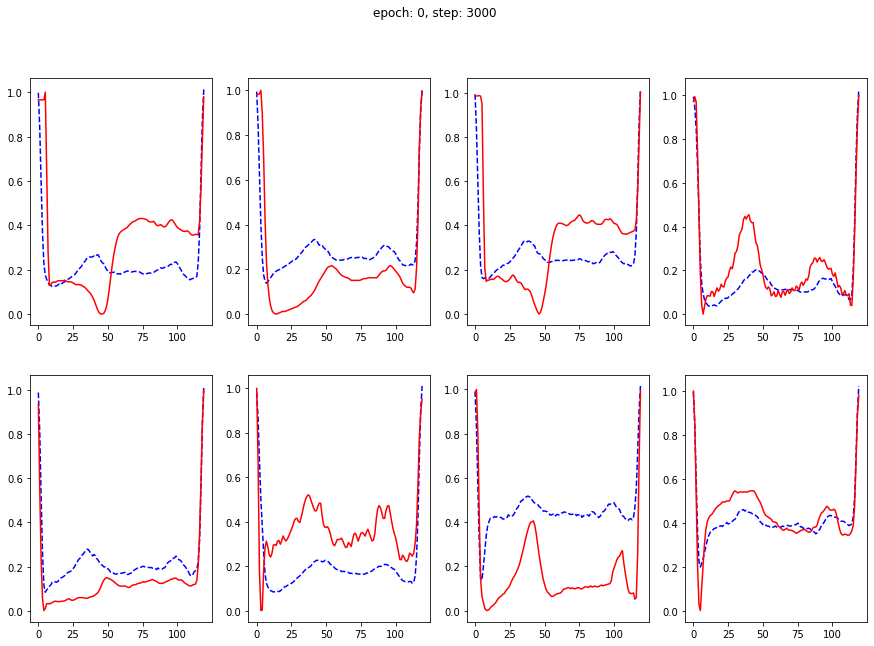

Epoch: 0 step: 3000 mean loss = 3.12924


In [ ]:
# Training loop
from IPython.display import clear_output
# generate random vector as test input to the decoder
random_vector_for_generation = tf.random.normal(shape=[16, LATENT_DIM])

# number of epochs
epochs = 5

# initialize the helper function to display outputs from an untrained model
#generate_and_save_images(decoder, 0, 0, random_vector_for_generation)

for epoch in range(epochs):
  print('Start of epoch %d' % (epoch, ))

  # iterate over the batches of the dataset
  for step ,i in enumerate(zip(train_dataset_ppg ,train_dataset_ecg)) :
    with tf.GradientTape() as tape:
      # feed a batch to the VAE model
      reconstructed = vae(i[0])

      # compute reconstruction loss
      flattened_inputs = tf.reshape(i[1], shape=[-1])
      flattened_outputs = tf.reshape(reconstructed, shape=[-1])
      loss = bce_loss(flattened_inputs, flattened_outputs) * 120  # image size (1024 * 1)
      
      # add KLD regularization loss
      loss += sum(vae.losses)

    # get the gradients and update the weights
    grads = tape.gradient(loss, vae.trainable_weights)
    optimizer.apply_gradients(zip(grads, vae.trainable_weights))

    # compute the loss metric
    loss_metric(loss)

    # display outputs every 100 steps
    if step % 1000 == 0:
      samples = np.random.randint(0 , 57397,8)
      clear_output(wait=True)
      #generate_and_save_images(decoder, epoch, step, random_vector_for_generation)
      modified_generate_and_save_images(vae, epoch, step,PPG_test.values[samples],ECG_test.values[samples])
      print('Epoch: %s step: %s mean loss = %s' % (epoch, step, loss_metric.result().numpy()))

# Model evaluation

In [ ]:
vae.evaluate(test_dataset_ppg,test_dataset_ecg)

RuntimeError: ignored

In [ ]:
prediction = vae.predict(test_dataset_ppg)

4323/4323 [==============================] - 18s 4ms/step


In [ ]:
 prediction.shape

(138314, 120, 1)

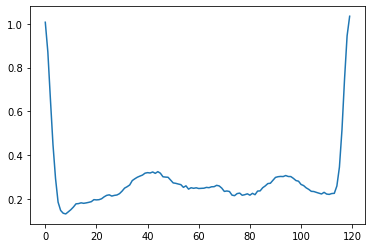

In [ ]:
plt.plot(prediction[10000,:,0])

In [ ]:
vae.save('/content/gdrive/MyDrive/most cleaned version beats/vae_try_to_complete')

In [ ]:
import keras 
model  = keras.models.load_model('/content/gdrive/MyDrive/most cleaned version beats/vae_try_to_complete')

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 120, 1)]     0           []                               
                                                                                                  
 model (Functional)             [(None, 128),        409356      ['input_3[0][0]']                
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                                  
 model_1 (Functional)           (None, 120, 1)       447937      ['model[0][2]']                  
                                                                                            

In [ ]:
ppg0 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/ppg_class_0.csv",names = np.arange(120))
ecg0 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/ecg_class_0.csv",names = np.arange(120))
ppg0_dataset = get_dataset(ppg_test,True)
ecg0_dataset = get_dataset(ecg_test,True)